In [1]:
from z3 import *

In [1]:
!pip install pyibex

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.7 MB 2.1 MB/s eta 0:00:01
  Created wheel for vibes: filename=vibes-0.2.2-py2.py3-none-any.whl size=8567 sha256=e32583872841e20495f66ad5f57f81eebfa530f5e13340cdb0cfd70481a36902
  Stored in directory: /home/philip/.cache/pip/wheels/6d/65/ab/d95b995a943193b9e470404cd367b9d1b2d3255ee58f18e6d2
Successfully built vibes


Notes from fptalks

- Eva talk really good. Makes so much sense
 
 - icing, HOL4 cakeml, 

- Range reduction
- crlibm. Do stuff in higher precision.
- deriving good polynomials for rounding purposes.
http://metalibm.org/

In [20]:
#metitarski

exp = Function("exp", RealSort(), RealSort())
x, y = Reals("x y")
def Abs(x):
    return If(x <= 0, -x, x)

s = Solver()
# exp lower bound
s.add( ForAll([x] , 1 + x <= exp(x)  ) )
#s.add( ForAll([x] , Implies( 0 <= x, 1 <= exp(x)  ) ))
s.add( ForAll([x] , Implies( x <= 0, exp(x) * ( - x **3 + 6 * x ** 2 - 24 * x + 48) ** 2 <= 2304 )))
#s.add( ForAll([x] , 0 <= exp(x)  ) )
theorem = ForAll([x], Abs( exp(x) - 1 )  <= exp(Abs(x)) - 1 )
s.add(Not(theorem))
s.check()
#s.model()

unknown

In [14]:

#x = Real("x")
x, y, z, e = Reals("x y z e")


z == (x + y)*(1 + e)


z == (x + y)*(1 + e)

In [ ]:
# proof is meta language inference.
# It correesponds to horizontal line
#

class Proof():
    def __init__(self, hyp, conc, axiom = False):
        if not axiom:
            s = Solver()
            s.add(hyp)
            s.add(Not(conc))
            res = s.check
            assert(res == unsat)
        self.hyp = hyp
        self.conc = conc
    def compose(self, rhs):
        s = Solver()
        s.add(self.conc)
        s.add(Not(rhs.hyp))
        res = s.check
        assert(res == unsat)
        return Proof(self.hyp, rhs.conc, axiom = True)
    def __str__(self):
        return f"{self.hyp}\n-------------\n{self.conc} "
    

In [19]:
s = Solver()
dt = Real("dt")
s.add(0 <= dt)
s.add(dt <= 1.1)
s.add(Not( And((1 + dt)**2  <= 1 + 3*dt , 
                        1 + 2 * dt  <= (1 + dt)**2 )  ))
s.check()
# ooh she's hurtin


AttributeError: 'Solver' object has no attribute 'getmodel'

prove bounds on (1 + 0.00000001)**10000000 as a finite but difficult to deal with stand in spec for y' = y

= (1 + 0.00000001)**5000000 ** 2
= 




1 + 2 * dt <= (1 + dt) * ( 1 + dt) <= 1 + 3*dt
(1 + 2dt)**2  <= (1 + dt) * (1 + dt) * () * ()

as long as dt >= 0
= (1 + 4dt) ** 2500...  <= (1 + 2dt) **2 ** 2500 = (1 + 2dt) ** 5000  <= (1 + dt)(1 + dt)** 50000  == (1 + dt)**1000000



In [ ]:
y = 1
# I'm not sure where i'm going with this
for i in range(10):
    t2 = FreshReal(prefix="dt")
    y2 = FreshReal(prefix="y")
    s.add(t2 == 2 * t)
    s.add(y2 == )
    
    y = y2
    dt = dt2

In [42]:
s = Solver()
dt = Real("dt")
N = 100
s.add(0 <= dt)
s.add(dt <= 1.0/(N+1))
s.add(Not( And((1 + dt)**N  <= 1 + (N + 1)*dt , 
                        1 + N * dt  <= (1 + dt)**N )  ))
s.check()

sat

In [43]:
s = Solver()
dt = Real("dt")
N = 100000000
s.add(Not( (1 + dt)**N == ((1 + dt) ** 2)**(N//2) ))
s.check()

unsat

In [50]:
# hmmmm.
s = Solver()
dt = Real("dt")
N = 1000 # even 1000 is slow.
s.add(dt >= 0)
s.add(dt <= 0.01)
s.add( Not((1 + 2*dt) <= (1 + dt)**2) )
s.check()

unsat

In [47]:
# hmmmm.
s = Solver()
dt = Real("dt")
N = 1000 # even 1000 is slow.
s.add(dt >= 0)
s.add( (1 + 2*dt) <= (1 + dt)**2 )
s.add(Not( (1 + 2 * dt)**(N//2) <= ((1 + dt) ** 2)**(N//2) ))
s.check()

unknown

In [51]:
# hmmmm.
s = Solver()
dt = Real("dt")
N = 1000 # even 1000 is slow.
s.add(dt >= 0)
s.add(dt <= 0.001)
s.add( (1 + 2*dt) <= (1 + dt)**2 )
s.add(Not( (1 + 2 * dt)**(N//2) <= (1 + dt)**(N//2) * (1 + dt)**(N//2) ))
s.check()

unknown

Maybe replace **n with an uniterpeted function pow

In [29]:
(1 + 0.0001)**100

1.0100496620928754

In [31]:
1 + 0.0001*101

1.0101

In [32]:
import numpy as np
import matplotlib.pyplot as plt

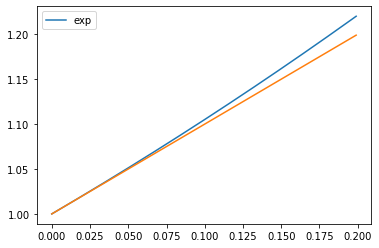

In [36]:
ts = np.arange(200) # np.linspace(0,1,100)
#plt.plot(ts, np.exp(ts))
#plt.plot(ts, 1 + ts * )
dt = 0.001
plt.plot( ts*dt , (1 + dt)**ts , label="exp" )
plt.plot( ts * dt , 1 + dt*ts )
plt.legend()

In [ ]:
np.linspace()

In [10]:
s = Solver()
s.add(True)
s.check()

sat

In [5]:


class Z3FloatModel():
    def __init__(self, solver=Solver()):


class Z3FloatVar():
    def __init__(self, name=None, val=None):
        
    def __add__(self,rhs):
        eps = FreshReal()
        self.model.solver.add(eps <= 0.0000001)
        self.model.solver.add(-0.0000001 <= eps)
        return Z3FloatVar( (self.val + rhs.val) * (1 + eps), model=self.model)
    def __mul__(self,rhs):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-5-338a01fe6478>, line 1)

In [4]:
import numpy as np
import cvxpy as cvx
import sympy as sy

A = np.array([[0,1],
             [-1,0]])



In [3]:
x,y,z = sy.symbols("x y z")

In [7]:
A@x

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [15]:
sy.Matrix([[2 + x,4],[2,4]]).nullspace()

[]

In [11]:
x = sy.Function("x")
t = sy.Symbol("t")
sy.diff(x(t),t)
sy.srepr(x(t,t))

"Function('x')(Symbol('t'), Symbol('t'))"

In [1]:
#help(sy.Function)

In [7]:
x = sy.Symbol("x")
t = sy.Symbol("t")
sy.diff(x(t),t)

TypeError: 'Symbol' object is not callable

In [17]:
class Comp(sy.Function):
    nargs = 2
#Comp(t,t,t)
Comp(t,x).args
sy.srepr(Comp(t,x))

"Comp(Symbol('t'), Function('x'))"

Guarded programs
integer linear programs
Guarded polynhomial and linear programs.


Julia seems like it's got nice solvers so

"Dynamical Systems and Computer Programs - Kind of the Same Thing"
https://dl.acm.org/doi/abs/10.1145/3385412.3385969 - PLDI talk on polynomial invaraint generation using QCLP


http://www.csl.sri.com/users/tiwari/papers/cav04.pdf



Victor Magron has some interesting stuff


Nondetermonisic or
() || ( )

update
x := 3x + 4
Guard   (x >= ) =>

type Var = Int
data Linear = Vector Double
data Prop = Eq0 Linear | GTE0 Linear | GT0 Linear
data Prog = Or Prog Prog | Update Var Linear | Guard Prop Prog | Seq Prog Prog | Star Prog


What is the minimal thing
data ProgSimple = Update | Seq





1. Guards

 /\ /\ /\ /\ => /\ /\ /\ 
 polytope containment

2.



3.